In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# 自訂 function 可重新 reload
from importlib import reload
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

# prediction

In [59]:

# 3_all
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_all/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/'
# dataset_folder = 'datasets/NYISO/dataset_3/all/'
# dataset_filename = 'load_array_all_test.npy'

# 3_CAPITL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_CAPITL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'CAPITL_test.npy'

# 3_CENTRL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_CENTRL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'CENTRL_test.npy'

# 3_DUNWOD
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_DUNWOD/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'DUNWOD_test.npy'

# 3_GENESE
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_GENESE/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'GENESE_test.npy'

# 3_HUD VL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_HUD VL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'HUD VL_test.npy'

# 3_LONGIL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_LONGIL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'LONGIL_test.npy'

# 3_MHK VL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_MHK VL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'MHK VL_test.npy'

# 3_MILLWD
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_MILLWD/T200_beta00.0001_betaT0.02/imputaiton_multiple/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'MILLWD_test.npy'

# 3_NYC
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_NYC/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'N.Y.C._test.npy'

# 3_NORTH
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_NORTH/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'NORTH_test.npy'

# 3_WEST
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_WEST/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'WEST_test.npy'

# zone
zone_name = ['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'HUD VL', 
             'LONGIL', 'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 
             'WEST']
zone_index = 7
main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
result_folder = 'results/NYISO_4/Zone/NYISO_4_'+ zone_name[zone_index] + '/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
dataset_folder = 'datasets/NYISO/dataset_4/zone/'
dataset_filename = zone_name[zone_index] + '_test.npy'
print(zone_name[zone_index])


MILLWD


In [60]:
pred_data = read_multiple_imputations(main_folder + result_folder, 24)
print(pred_data.shape)

file_path = os.path.join(main_folder + result_folder, 'original0.npy')
true_data = np.load(file_path)
print(true_data.shape)
true_data_target = true_data[:,:,-24:]
print(true_data_target.shape)

file_path = os.path.join(main_folder + dataset_folder, dataset_filename)
true_data_o = np.swapaxes(np.load(file_path), axis1=1, axis2=2)
print(true_data_o.shape)

true_data_o_cond = true_data_o[:,:,0:168]
print(true_data_o_cond.shape)
true_data_o_target = true_data_o[:,:,-24:]
print(true_data_o_target.shape)

(100, 73, 1, 24)
(73, 1, 192)
(73, 1, 24)
(73, 1, 192)
(73, 1, 168)
(73, 1, 24)


In [61]:
pred_mean = np.mean(pred_data, axis = 0)
pred_median = np.median(pred_data, axis = 0)

m = np.mean(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))
s = np.std(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))

pred_mean_o = pred_mean*s + m
pred_median_o = pred_median*s + m


In [62]:
mape_all = np.squeeze(np.mean(abs((true_data_o_target - pred_median_o))/true_data_o_target*100, axis = 2))
mse_all = np.squeeze(np.mean(np.square(true_data_target - pred_mean), axis = 2))

2016/10/20


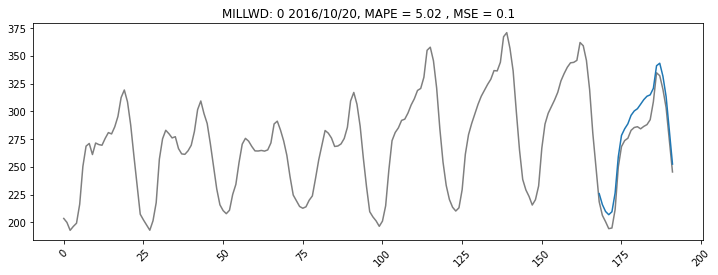

2016/10/21


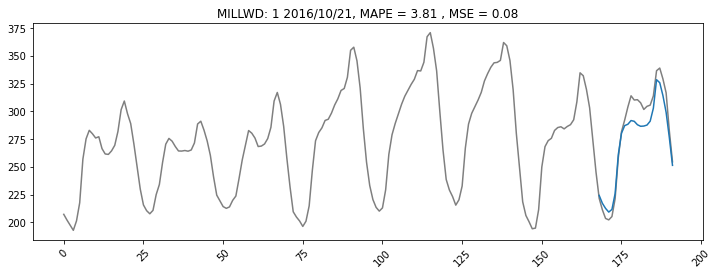

2016/10/22


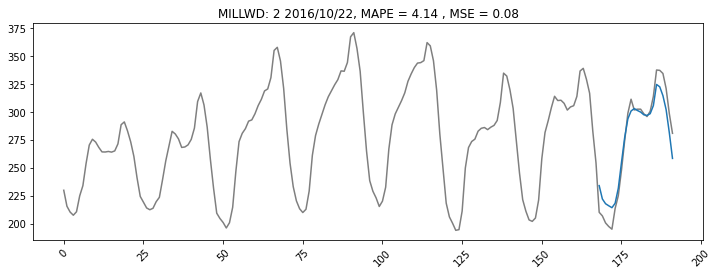

2016/10/23


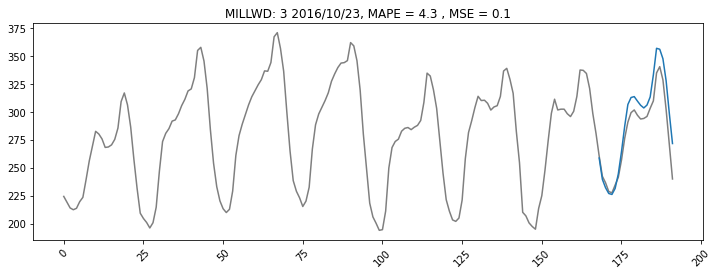

2016/10/24


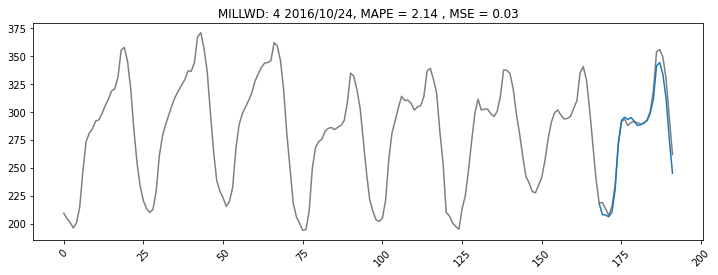

2016/10/25


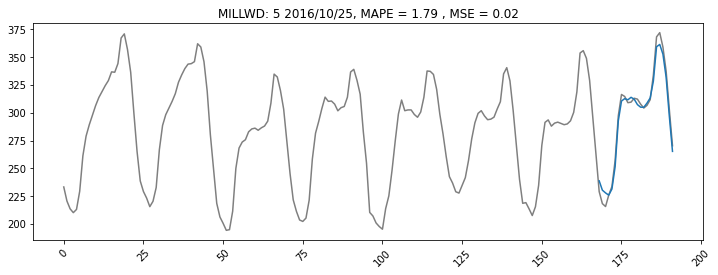

2016/10/26


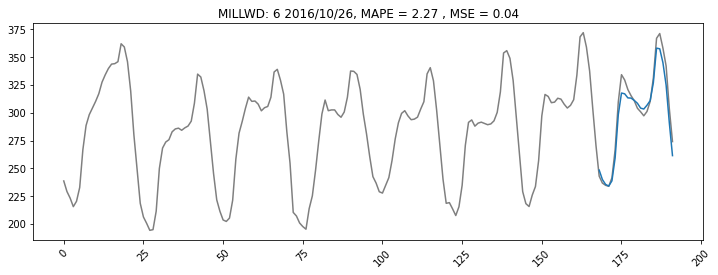

2016/10/27


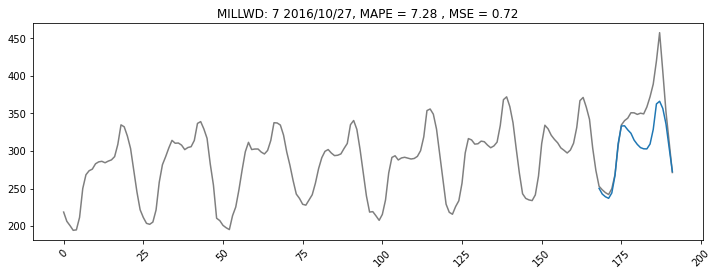

2016/10/28


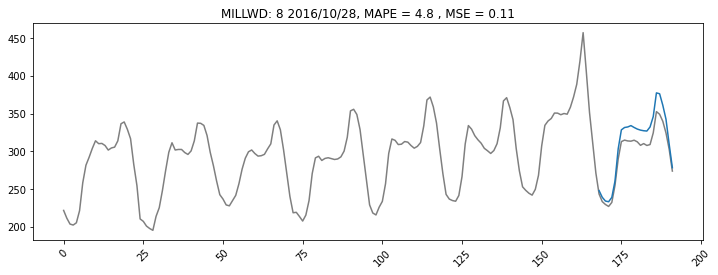

2016/10/29


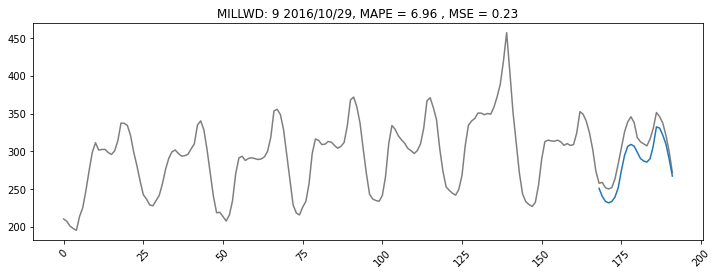

2016/10/30


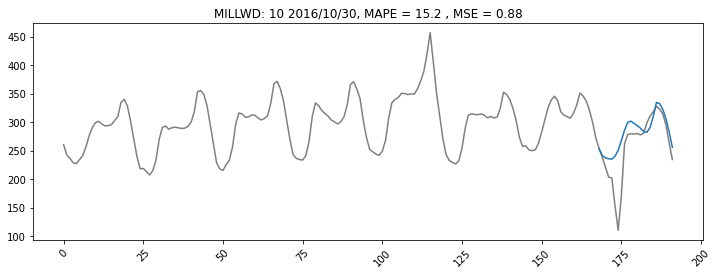

In [63]:
for obs in range(0,11,1):
    date = generate_date_from_seq(obs)
    print(date)
    x = range(0,192)
    y = true_data_o[obs,0,:]
    x_pred = range(168, 192)
    y_pred = pred_mean_o[obs,0,:]


    plt.figure(figsize=(12, 4)) 
    plt.plot(x, y, color = 'tab:gray')
    plt.plot(x_pred, y_pred, color = 'tab:blue')
    plt.title(f'{zone_name[zone_index]}: {obs} {date}, MAPE = {round(mape_all[obs],2)} , MSE = {round(mse_all[obs]*1,2)}')
    plt.xticks(rotation=45) 
    plt.show()


# AR results

In [2]:
from sklearn.metrics import mean_squared_error

In [41]:
main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/results/'

# 設定 1
# sub_folder = 'ar1-6/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k/'
# sub_folder = 'ar1-6/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/'

# 設定 2
# sub_folder = 'ar1-4/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
sub_folder = 'ar1-4/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/'

# 設定 3
# sub_folder = 'ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k_5/'
# sub_folder = 'ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k/'

# 設定 1 center
# sub_folder = 'ar1-9/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/'



In [42]:
# data = np.load(main_folder + sub_folder + 'original0.npy')

# r_to_data = []
# r_to_signal = []
# for i in range(10):
#     pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
#     r_to_signal.append(mean_squared_error(pred[:,:,-1], data[:,:,-2]*0.8))
#     r_to_data.append(mean_squared_error(pred[:,:,-1], data[:,:,-1]))
    
# print(np.mean(r_to_signal))
# print(np.mean(r_to_data))


In [45]:
data = np.load(main_folder + sub_folder + 'original0.npy')

last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

for i in range(1):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))


last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
p = np.mean(last_pred[:,:,:,-1], axis = 0)   

a = p[:,0]
b = data[:,:,-2].reshape(-1)

print(f'MSE=E[(p-0.8*y_2)^2] = {mean_squared_error(a, b*0.8)}')
print(f'MSE to data = E[(p-y_2)^2] = {mean_squared_error(a, b)}')

print(f'E(p-0.8*y_2) = {np.mean(a-b*0.8)}')
print(f'var(p-0.8*y_2) = {np.var(a-b*0.8)}')


MSE=E[(p-0.8*y_2)^2] = 0.43037382055408885
MSE to data = E[(p-y_2)^2] = 0.6132244051823439
E(p-0.8*y_2) = -0.032557706793071704
var(p-0.8*y_2) = 0.42931381628246523


(1000,)

In [35]:

# back to non-centealized
# data = np.load(main_folder + sub_folder + 'original0.npy')

data = np.load('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/test_ar1_1000_3.npy')
mean = np.mean(data[:, 0:2, :], axis = 1).reshape(-1)

data = np.swapaxes(data,1,2)
last_pred = np.expand_dims(np.empty(data.shape), axis = 0)


for i in range(1):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))


last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
p = np.mean(last_pred[:,:,:,-1], axis = 0)   

a = p[:,0] + mean
b = data[:,:,-2].reshape(-1) 

print(f'MSE=E[(p-0.8*y_2)^2] = {mean_squared_error(a, b*0.8)}')
print(f'MSE to data = E[(p-y_2)^2] = {mean_squared_error(a, b)}')

print(f'E(p-0.8*y_2) = {np.mean(a-b*0.8)}')
print(f'var(p-0.8*y_2) = {np.var(a-b*0.8)}')


MSE=E[(p-0.8*y_2)^2] = 1.3133920926587739
MSE to data = E[(p-y_2)^2] = 1.3000695045331403
E(p-0.8*y_2) = 0.05664276086145241
var(p-0.8*y_2) = 1.3101836903007662


In [26]:
data.shape

(1000, 3, 1)